# SQL

Данная тетрадь содержит решение практических задач по SQL с использованием оконных функций. Используется база данных Stack Overflow за первые месяцы существования проекта.

In [1]:
import matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sqlalchemy import create_engine 

### Конфигурация для подключения к базе данных
Эта база данных содержит схему `stackoverflow`, с которой мы будем работать в проекте

In [2]:
db_config = {
    'user': 'XXX', 
    'pwd': 'XXX', 
    'host': 'XXX',
    'port': 0000, 
    'db': 'XXX' 
}  

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

Создание подключения

In [3]:
engine = create_engine(connection_string) 

## Задание 1

Выведите общую сумму просмотров постов за каждый месяц 2008 года. Если данных за какой-либо месяц в базе нет, такой месяц можно пропустить. Результат отсортируйте по убыванию общего количества просмотров.

| month_date  | total_views |
| ------------- | ------------- |
| 2008-09-01  | 452928568  |
| 2008-10-01  | 365400138  |
| ...         | ... |

In [5]:
# запрос
query = '''
SELECT date_trunc('month', creation_date) AS month_date,
    sum(views_count) AS total_views
FROM stackoverflow.posts
GROUP BY date_trunc('month', creation_date)
ORDER BY sum(views_count) DESC
'''

# выполнение запроса
sample_df = pd.read_sql_query(query, con=engine)

sample_df

,month_date,total_views
0,2008-09-01,452928568
1,2008-10-01,365400138
2,2008-11-01,221759651
3,2008-12-01,197792841
4,2008-08-01,131367083
5,2008-07-01,669895


Проанализируйте итоговую таблицу. Отличаются ли данные за разные месяцы? С чем могут быть связаны отличия?

In [ ]:
# напишите ваш ответ здесь

Ответ: 
1. Данные за разные месяцы отличаются.
2. Отличия скорее всего связаны с запуском платформы в сентябре 2008 года и взрывным ростом интереса к платформе и последующим спадом этого интереса.

# Задание 2

Выведите имена самых активных пользователей, которые в первый месяц после регистрации (включая день регистрации) дали больше 100 ответов. Вопросы, которые задавали пользователи, не учитывайте. Для каждого имени пользователя выведите количество уникальных значений `user_id`. Отсортируйте результат по полю с именами в лексикографическом порядке.

| display_name | count |
| ------------ | ----- |
| 1800 INFORMATION | 1 |
| Adam Bellaire | 1 |
| Adam Davis | 1 |
| ... | ... |

In [7]:
# запрос
query = '''
SELECT u.display_name AS display_name,
    COUNT(DISTINCT u.id)
FROM stackoverflow.posts AS p
LEFT JOIN stackoverflow.users AS u ON p.user_id = u.id
WHERE p.post_type_id = 2 AND
    p.creation_date BETWEEN u.creation_date AND u.creation_date + INTERVAL '1 month'
GROUP BY u.display_name
HAVING COUNT(p.id) > 100
ORDER BY display_name
'''

# выполнение запроса
sample_df = pd.read_sql_query(query, con=engine)

sample_df

,display_name,count
0,1800 INFORMATION,1
1,Adam Bellaire,1
2,Adam Davis,1
3,Adam Liss,1
4,Alan,8
...,...,...
71,leppie,1
72,lomaxx,1
73,mattlant,1
74,paxdiablo,1


In [8]:
# Проверим уникальные значения признака count
sample_df['count'].unique()

array([ 1,  8, 15, 29, 10, 21, 12,  7,  9, 16,  5, 11,  3, 19])

In [9]:
# Проверим уникальные значения признака display_name
sample_df['display_name'].values

array(['1800 INFORMATION', 'Adam Bellaire', 'Adam Davis', 'Adam Liss',
       'Alan', 'Amy B', 'Ben Hoffstein', 'Brian', 'Cade Roux', 'CesarB',
       'Chris', 'ConcernedOfTunbridgeWells', 'Craig', 'Dale Ragan', 'Dan',
       'Eric Z Beard', 'Espo', 'FlySwat', 'Franci Penov', 'GEOCHET',
       'GateKiller', 'Greg', 'Gulzar Nazim', 'Ilya Kochetov',
       'James Curran', 'Jim', 'Joe', 'Joel Coehoorn',
       'Johannes Schaub - litb', 'John Millikin', 'Jon Limjap',
       'Jon Skeet', 'Jorge Ferreira', 'Josh', 'Keith', 'Kevin', 'Kibbee',
       'Konrad Rudolph', 'Lasse Vågsæther Karlsen', 'Marc Gravell',
       'Mark', 'Mark Cidade', 'Mark Harrison', 'Matt', 'Matt Hamilton',
       'Michael Burr', 'Michael Stum', 'Mitchel Sellers', 'Nick',
       'Norman Ramsey', 'Oli', 'Orion Edwards', 'Paul Nathan', 'PhiLho',
       'Rob', 'Rob Cooper', 'Rob Walker', 'Ryan', 'S.Lott', 'Sklivvz',
       'Steven A. Lowe', 'TheSmurf', 'Tom', 'Vilx-', 'Vinko Vrsalovic',
       'aku', 'anjanb', 'dkretz', 'f

In [10]:
# отбросим все имена, которые встречаются только один раз
sample_df = sample_df.query('count != 1')

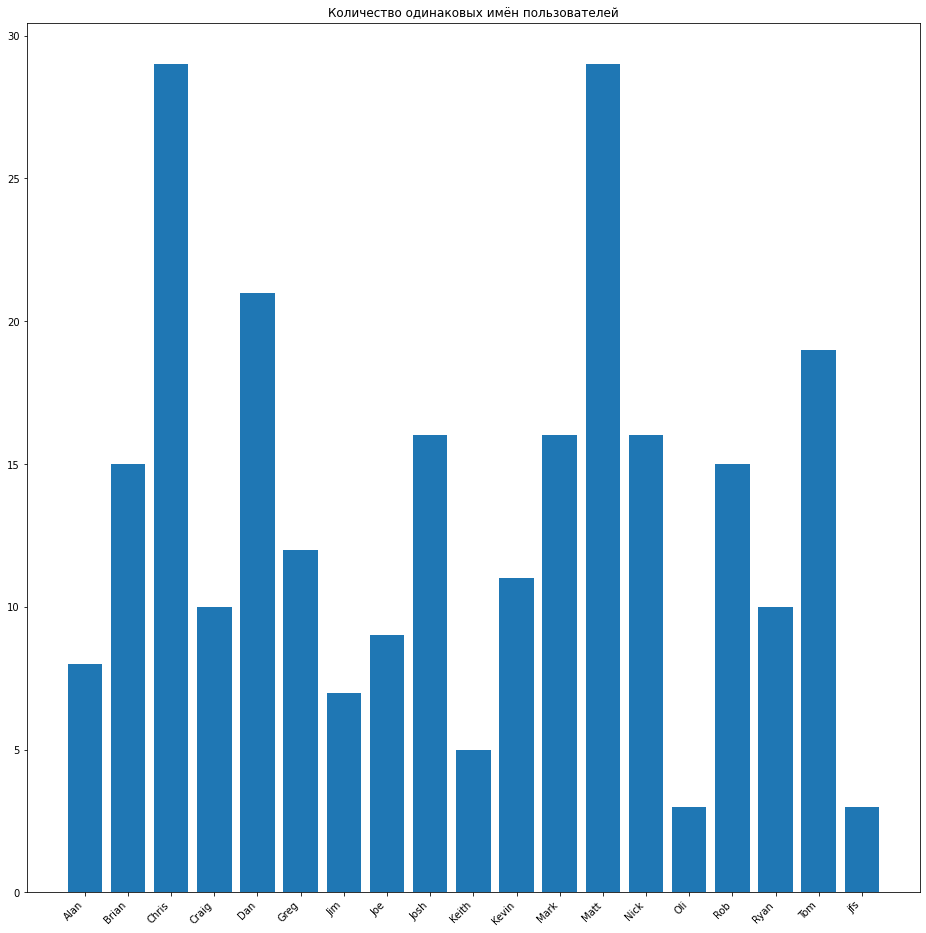

In [15]:
# построим столбчатую диаграмму, чтобы увидеть какие именна часто повторяются
y = sample_df['count'].values
x = sample_df['display_name'].values


plt.figure(figsize=(16,16))
plt.title('Количество одинаковых имён пользователей')
plt.xticks(rotation=45, ha='right')
plt.bar(x, y)
plt.show()

Какие аномалии наблюдаются в данных? О чём они говорят?

In [10]:
# напишите ваш ответ здесь

Ответ:

В полученной выборке некоторые имена пользователей дублируются. По диаграмме видно, что часто дублируются распространенные имена. Среди имён встречается аномалия - имя `jfs` существует более чем у одного пользователя.

# Задание 3

Выведите количество постов за 2008 год по месяцам. Отберите посты от пользователей, которые зарегистрировались в сентябре 2008 года и сделали хотя бы один пост в декабре того же года. Отсортируйте таблицу по значению месяца по убыванию.

| month | count |
| ------|------ |
| 2008-12-01 | 17641 |
| 2008-11-01 | 18294 |
| ... | ... |

In [11]:
# запрос
query = '''
SELECT DATE_TRUNC('month', p.creation_date) AS month,
    COUNT(p.id)
FROM stackoverflow.posts AS p
WHERE p.user_id IN (SELECT p.user_id
    FROM stackoverflow.posts AS p
    LEFT JOIN stackoverflow.users AS u ON p.user_id = u.id
    WHERE EXTRACT(MONTH FROM u.creation_date) = 9 
        AND EXTRACT(YEAR FROM u.creation_date) = 2008 
        AND EXTRACT(MONTH FROM p.creation_date) = 12
        AND EXTRACT(YEAR FROM p.creation_date) = 2008)
GROUP BY DATE_TRUNC('month', p.creation_date)
ORDER BY month DESC
'''

# выполнение запроса
sample_df = pd.read_sql_query(query, con=engine) 

sample_df

,month,count
0,2008-12-01,17641
1,2008-11-01,18294
2,2008-10-01,27171
3,2008-09-01,24870
4,2008-08-01,32


Изучите данные: есть ли в них аномалии? Предположите, почему могли появиться аномальные значения.

In [12]:
# напишите ваш ответ здесь

Ответ:

Да, присутствует аномалия - 32 поста было написано в августе. Пользователи в выборке создали аккаунты только в сентябре. Вероятно аномалия связана с тем, что посты могли быть созданы разработчиками или тестировщиками платформы. Возможно дату создания аккаунта после запуска платформы в сентябре 2008 года им поменяли. 

# Задание 4

Используя данные о постах, выведите несколько полей:

- идентификатор пользователя, который написал пост;
- дата создания поста;
- количество просмотров у текущего поста;
- сумму просмотров постов автора с накоплением.

Данные в таблице должны быть отсортированы по возрастанию идентификаторов пользователей, а данные об одном и том же пользователе — по возрастанию даты создания поста.

| user_id | creation_date | views_count | cumulative_count |
| ------ | -------------- | ----------- | ---------------- |
| 1 | 2008-07-31 23:41:00  | 480476   | 480476  |
| 1 | 2008-07-31 23:55:38  | 136033 | 616509  | 
| 1 | 2008-07-31 23:56:41  | 0 |  616509  |
| ... | ... | ... | ... |
| 2 | 2008-07-31 23:56:41 | 79087  | 79087 |
| 2 | 2008-08-01 05:09:56 | 65443 | 144530 |
| ... | ...  | ...  | ...  |

In [13]:
# запрос
query = '''
SELECT user_id,
    creation_date,
    views_count,
    SUM(views_count) OVER(PARTITION BY user_id ORDER BY creation_date) AS cumulative_count
FROM stackoverflow.posts
'''

# выполнение запроса
sample_df = pd.read_sql_query(query, con=engine)

sample_df

,user_id,creation_date,views_count,cumulative_count
0,1,2008-07-31 23:41:00,480476,480476
1,1,2008-07-31 23:55:38,136033,616509
2,1,2008-07-31 23:56:41,0,616509
3,1,2008-08-04 02:45:08,0,616509
4,1,2008-08-04 04:31:03,0,616509
...,...,...,...,...
243791,5696608,2008-12-23 16:00:37,0,2804
243792,5696608,2008-12-23 17:35:09,0,2804
243793,5696608,2008-12-24 01:02:48,0,2804
243794,5696608,2008-12-30 14:34:45,0,2804


# Задание 5

Найдите среднее количество постов пользователей в день за август 2008 года. Отберите данные о пользователях, которые опубликовали больше 120 постов за август. Дни без публикаций не учитывайте. 

Отсортируйте результат по возрастанию среднего количества постов. Значения можно не округлять.

| user_id | avg_daily |
| ------- | --------- |
| 116     | 4.777778  |
| 234     | 5.208333  |
| ...     | ... |

In [16]:
# запрос
query = '''
WITH first_query AS
    (SELECT user_id,
        DATE_TRUNC('day', creation_date) AS day_of_month,
        COUNT(id) as posts_in_this_day
    FROM stackoverflow.posts
    WHERE user_id IN (SELECT user_id
        FROM stackoverflow.posts
        WHERE EXTRACT(MONTH FROM creation_date) = 8
            AND EXTRACT(YEAR FROM creation_date) = 2008
        GROUP BY user_id
        HAVING COUNT(id) > 120)
        AND EXTRACT(MONTH FROM creation_date) = 8
        AND EXTRACT(YEAR FROM creation_date) = 2008
    GROUP BY user_id, DATE_TRUNC('day', creation_date))
    

SELECT user_id,
    AVG(posts_in_this_day) AS avg_daily
FROM first_query
GROUP BY user_id
ORDER BY avg_daily
'''

# выполнение запроса
sample_df = pd.read_sql_query(query, con=engine)

sample_df

,user_id,avg_daily
0,116,4.777778
1,234,5.208333
2,91,5.681818
3,905,7.000000
4,383,7.277778


# Задание 6

Сколько в среднем дней в период с 1 по 7 декабря 2008 года пользователи взаимодействовали с платформой? Для каждого пользователя отберите дни, в которые он или она опубликовали хотя бы один пост. Нужно получить одно целое число — не забудьте округлить результат. 

| result |
| -----  |
| <целое число> |

In [15]:
# запрос
query = '''
WITH first_query AS (SELECT id, creation_date, user_id,
        DENSE_RANK() OVER(PARTITION BY user_id ORDER BY DATE_TRUNC('day', creation_date)) AS user_days
    FROM stackoverflow.posts
    WHERE creation_date BETWEEN '2008-12-1' AND '2008-12-7')
    
SELECT ROUND(AVG(user_days))::integer AS result
FROM first_query
'''

# выполнение запроса
sample_df = pd.read_sql_query(query, con=engine)

sample_df

,result
0,2


Проанализируйте итоговую таблицу — какие выводы можно сделать?

In [16]:
# напишите ваш ответ здесь

Ответ:

С 1 по 7 декабря 2008 года пользователи взаимодействовали с платформой в среднем 2 дня

# Задание 7

Выведите историю активности каждого пользователя в таком виде: идентификатор пользователя, дата публикации поста. Отсортируйте вывод по возрастанию идентификаторов пользователей, а для каждого пользователя — по возрастанию даты публикации.

Добавьте в таблицу новое поле: для каждого поста в нём будет указано название месяца предпоследней публикации пользователя относительно текущей. Если такой публикации нет, укажите `NULL`.  Python автоматически поменяет `NULL` на `None`, но дополнительно преобразовывать значения `None` вам не нужно.

Посмотрите внимательно на образец таблицы: для первых двух постов предпоследней публикации нет, но, начиная с третьего поста, в новое поле входит нужный месяц. Для следующего пользователя в первые две записи поля `second_last_month` тоже войдёт `NULL`.

| user_id | creation_date | second_last_month |
| ------- | ------------- | ----------------- |
| 1       | 2008-07-31 23:41:00 | None |
| 1       | 2008-07-31 23:55:38 | None |
| 1       | 2008-07-31 23:56:41 | July |
| 1       | 2008-08-04 02:45:08 | July |
| 1       | 2008-08-04 04:31:03 | July |
| 1       | 2008-08-04 08:04:42 | August |
| ... | ... | ... |

In [17]:
# запрос
query = '''
SELECT user_id, creation_date,
    LAG(TO_CHAR(creation_date, 'Month'), 2) OVER(PARTITION BY user_id ORDER BY creation_date) AS second_last_month
FROM stackoverflow.posts
'''

# выполнение запроса
sample_df = pd.read_sql_query(query, con=engine)

sample_df

,user_id,creation_date,second_last_month
0,1,2008-07-31 23:41:00,None
1,1,2008-07-31 23:55:38,None
2,1,2008-07-31 23:56:41,July
3,1,2008-08-04 02:45:08,July
4,1,2008-08-04 04:31:03,July
...,...,...,...
243791,5696608,2008-12-23 16:00:37,December
243792,5696608,2008-12-23 17:35:09,December
243793,5696608,2008-12-24 01:02:48,December
243794,5696608,2008-12-30 14:34:45,December


# Задание 8

Рассчитайте аналог Retention Rate по месяцам для пользователей StackOverflow. Объедините пользователей в когорты по месяцу их первого поста. Возвращение определяйте по наличию поста в текущем месяце. 

| cohort_dt | session_date | users_cnt | cohort_users_cnt | retention_rate |
| --- | --- | --- | --- | --- |
| 2008-07-01 00:00:00 | 2008-07-01 00:00:00 | 3 | 3 | 100 |
| 2008-07-01 00:00:00 | 2008-08-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-09-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-10-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-11-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-12-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-08-01 00:00:00 | 2008-08-01 00:00:00 | 2151 | 2151 | 100 |
| ... | ... | ... | ... | ... |

In [18]:
# запрос
query = '''
WITH 
first_post_month AS 
    (SELECT DISTINCT(user_id),
        DATE_TRUNC('month', FIRST_VALUE(creation_date) OVER(PARTITION BY user_id ORDER BY creation_date)) as first_post_month
    FROM stackoverflow.posts),
profile AS 
    (SELECT *,
        COUNT(*) OVER(PARTITION BY first_post_month) AS cohort_users_cnt
    FROM first_post_month),
sessions AS 
    (SELECT user_id,
        DATE_TRUNC('month', creation_date) AS session_date
    FROM stackoverflow.posts
    GROUP BY 1, 2)
    
SELECT p.first_post_month AS cohort_dt,
       s.session_date,
       COUNT(p.user_id) AS users_cnt,
       p.cohort_users_cnt,
       ROUND(COUNT(p.user_id) * 100.0 / p.cohort_users_cnt, 2) AS retention_rate
FROM profile p
JOIN sessions s ON p.user_id = s.user_id
GROUP BY 1,
         2,
         4
ORDER BY cohort_dt, s.session_date
'''

# выполнение запроса
sample_df = pd.read_sql_query(query, con=engine)

sample_df

,cohort_dt,session_date,users_cnt,cohort_users_cnt,retention_rate
0,2008-07-01,2008-07-01,3,3,100.00
1,2008-07-01,2008-08-01,2,3,66.67
2,2008-07-01,2008-09-01,1,3,33.33
3,2008-07-01,2008-10-01,2,3,66.67
4,2008-07-01,2008-11-01,1,3,33.33
5,2008-07-01,2008-12-01,2,3,66.67
6,2008-08-01,2008-08-01,2151,2151,100.00
7,2008-08-01,2008-09-01,1571,2151,73.04
8,2008-08-01,2008-10-01,1275,2151,59.27
9,2008-08-01,2008-11-01,1050,2151,48.81


Постройте тепловую карту Retention Rate. Какие аномалии или другие необычные явления удалось выявить? Сформулируйте гипотезы о возможных причинах.

In [19]:
# построение тепловой карты Retention Rate

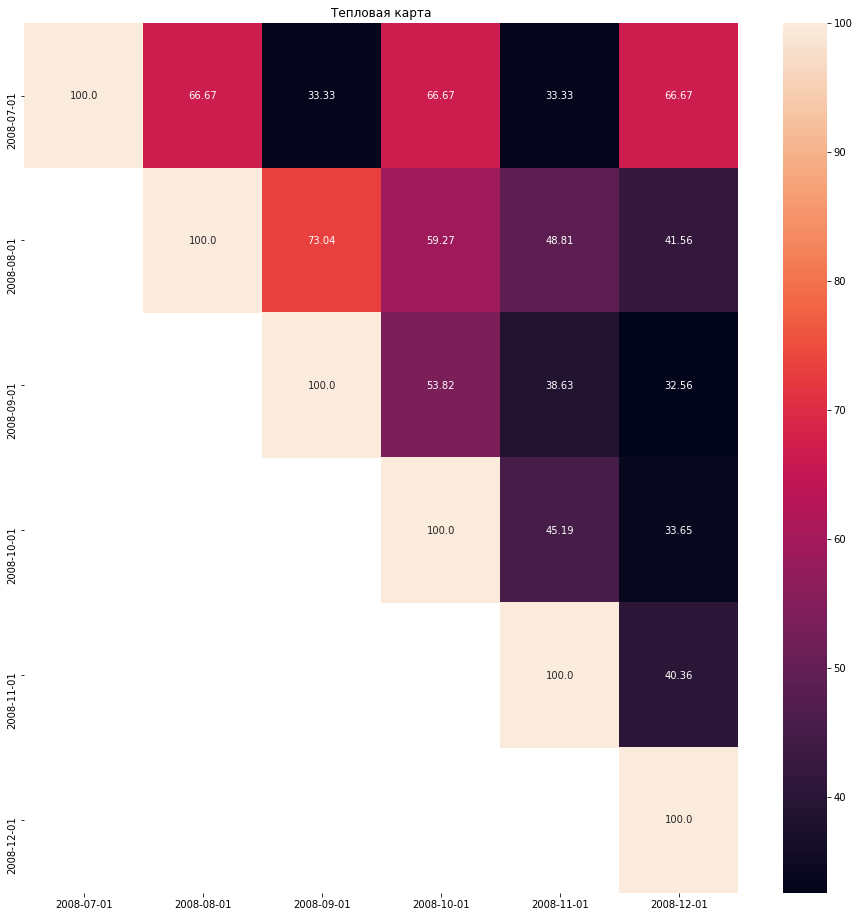

In [20]:
retention = sample_df.pivot('cohort_dt', 'session_date', 'retention_rate')
retention.index = [str(x)[0:10] for x in retention.index]
retention.columns = [str(x)[0:10] for x in retention.columns]

plt.figure(figsize=(16, 16)) 
sns.heatmap(retention, 
            annot=True, 
            fmt='') 
plt.title('Тепловая карта')
plt.show()

In [21]:
# опишите аномалии или другие необычные явления и сформулируйте гипотезы

Ответ:
1. В когорте от июля 2008 года наблюдаются перепады Retention Rate. Данная когорта состоит только из 3 участников (вероятно тестировщики и/или разработчики платформы), поэтому можно не принимать во внимание Retention Rate данной когорты. 
2. Остальные когорты более многочисленны. Retention Rate для указанных когорт стабильно уменьшается со временем.    
3. Retention Rate 2, 3 и последующих месяцев у каждой новой когорты меньше по сравнению с предыдущей когортой за тот же порядковый месяц.
    * Гипотеза: Это может быть связано с тем, что платформа наполняется контентом и всё больше появляется популярных вопросов и ответов на них.   

# Задание 9


На сколько процентов менялось количество постов ежемесячно с 1 сентября по 31 декабря 2008 года? Отобразите таблицу со следующими полями:

- номер месяца;
- количество постов за месяц;
- процент, который показывает, насколько изменилось количество постов в текущем месяце по сравнению с предыдущим.

Если постов стало меньше, значение процента должно быть отрицательным, если больше — положительным. Округлите значение процента до двух знаков после запятой.

Напомним, что при делении одного целого числа на другое в PostgreSQL в результате получится целое число, округлённое до ближайшего целого вниз. Чтобы этого избежать, переведите делимое в тип `numeric`.

| creation_month | posts_count | percentage |
| -------------- | ----------- | ---------- |
| 9 | 70731 | Nan |
| 10 | 63102 | -10.33 |
| ... | ... | ... |

In [22]:
# запрос
query = '''

WITH 
posts_per_month AS
    (SELECT EXTRACT(MONTH FROM creation_date)::integer AS creation_month,
        COUNT(id) AS posts_count
    FROM stackoverflow.posts
    WHERE creation_date BETWEEN '2008-09-01' AND '2008-12-31'
    GROUP BY EXTRACT(MONTH FROM creation_date)
    ORDER BY creation_month),
lag AS 
    (SELECT *,
        LAG(posts_count) OVER() AS prev_month_posts
    FROM posts_per_month)
    
SELECT creation_month,
    posts_count,
    ROUND((100 * (posts_count - prev_month_posts)::numeric / prev_month_posts), 2) AS percentage
FROM lag
'''

# выполнение запроса
sample_df = pd.read_sql_query(query, con=engine)

sample_df

,creation_month,posts_count,percentage
0,9,70371,NaN
1,10,63102,-10.33
2,11,46975,-25.56
3,12,44592,-5.07


Постройте круговую диаграмму с количеством постов по месяцам.

In [23]:
# постройте круговую диаграмму с количеством постов по месяцам

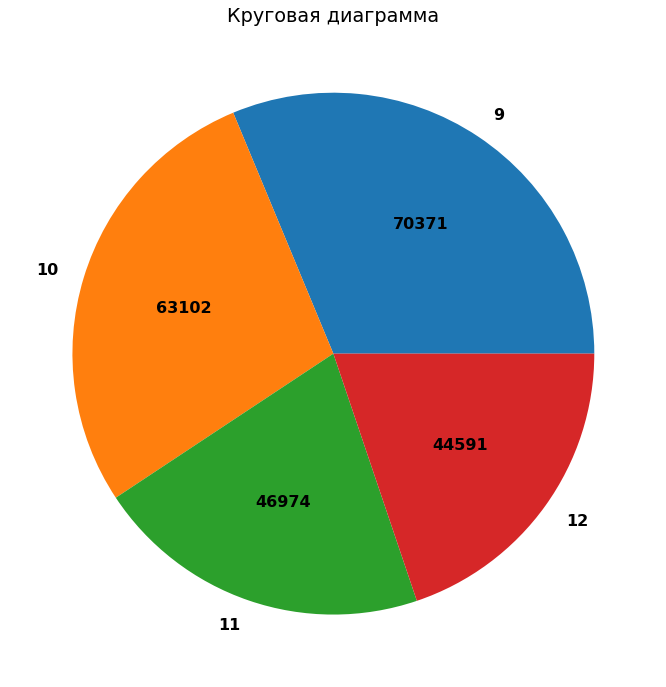

In [24]:
months = sample_df.creation_month.values
posts = sample_df.posts_count.values

def absolute_value(val):
    a  = int(val/100.*posts.sum())
    return a

font = {'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

plt.figure(figsize=(12,12))
plt.title('Круговая диаграмма')
plt.pie(posts, labels=months, autopct=absolute_value)
plt.show()

# Задание 10

Выгрузите данные активности пользователя, который опубликовал больше всего постов за всё время. Выведите данные за октябрь 2008 года в таком виде:

- номер недели;
- дата и время последнего поста, опубликованного на этой неделе.

| week_creation | creation_date |
| ------------- | ------------- |
| 40 | 2008-10-05 09:00:58 |
| 41 | 2008-10-12 21:22:23 |
| ... | ... |

In [25]:
# запрос
query = '''
WITH 
top_user AS 
    (SELECT user_id
    FROM stackoverflow.posts
    GROUP BY user_id
    ORDER BY COUNT(id) DESC
    LIMIT 1),
weeks AS
    (SELECT EXTRACT(WEEK FROM creation_date)::integer AS week_creation,
    creation_date
    FROM stackoverflow.posts AS p
    RIGHT JOIN top_user AS tp ON p.user_id = tp.user_id 
    WHERE DATE_TRUNC('month', creation_date) = '2008-10-01')

SELECT DISTINCT(week_creation),
    LAST_VALUE(creation_date) OVER(PARTITION BY week_creation 
                                    ORDER BY creation_date 
                                    ROWS BETWEEN CURRENT ROW AND UNBOUNDED FOLLOWING) AS creation_date
FROM weeks
'''

# выполнение запроса
sample_df = pd.read_sql_query(query, con=engine)

sample_df

,week_creation,creation_date
0,40,2008-10-05 09:00:58
1,41,2008-10-12 21:22:23
2,42,2008-10-19 06:49:30
3,43,2008-10-26 21:44:36
4,44,2008-10-31 22:16:01
